In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import natsort
from operator import itemgetter
import matplotlib.pyplot as plt
from matplotlib import lines,patches

import os
import warnings
from files_cleaning import *

import readline # see https://github.com/daniel-acuna/reviewer_assignment/issues/29
%load_ext rpy2.ipython 

# set option seaborn
# sns.set_context("poster",font_scale=1.5)

# avoid the repeated warning, see http://stackoverflow.com/q/35175949/4929813
warnings.filterwarnings('ignore', '.*A value is trying to be set on a copy of a slice from a DataFrame.*')

/home/giuseppec/miniconda3/envs/graphs/lib/python3.5/site-packages/rpy2/robjects/robject.py:6: UserWarning: During startup - 
  rpy2.rinterface.initr()
/home/giuseppec/miniconda3/envs/graphs/lib/python3.5/site-packages/rpy2/robjects/robject.py:6: UserWarning: Warning messages:

  rpy2.rinterface.initr()
/home/giuseppec/miniconda3/envs/graphs/lib/python3.5/site-packages/rpy2/robjects/robject.py:6: UserWarning: 1: Setting LC_MONETARY failed, using "C" 

  rpy2.rinterface.initr()
/home/giuseppec/miniconda3/envs/graphs/lib/python3.5/site-packages/rpy2/robjects/robject.py:6: UserWarning: 2: Setting LC_PAPER failed, using "C" 

  rpy2.rinterface.initr()
/home/giuseppec/miniconda3/envs/graphs/lib/python3.5/site-packages/rpy2/robjects/robject.py:6: UserWarning: 3: Setting LC_MEASUREMENT failed, using "C" 

  rpy2.rinterface.initr()


In [2]:
###################
#INTERVENTION FILE#
###################

# files
finalissimo='/media/giuseppec/25F62A4E5FEED162/Dropbox/Dropbox/Formit (1)/Survey/Most_updated_questionnaires/160619_FINALISSIMO.xls'
ecoregion='/media/giuseppec/25F62A4E5FEED162/work/FORMIT/WP3/LCA/correspondence_file/countr_ecor_correspondence.csv'
management_codes='/media/giuseppec/25F62A4E5FEED162/work/FORMIT/WP3/LCA/correspondence_file/Sp_man_codes.xls'
species_codes='/media/giuseppec/25F62A4E5FEED162/work/FORMIT/WP3/LCA/correspondence_file/Sp_man_codes.xls'
mach='equipment.xls'

#imports
int_one='PAPER_1_int_1_hours.xls'
int_two='PAPER_1_int_2_harv_amount.xls'


# import and first cleaning
one_in,two_in=initial_clean_interv(int_one,int_two,mach)
#fix duplicates
one_no_dup=clean_dup_rows_int(one_in)
two_no_dup=clean_dup_rows_int(two_in)

#merge the two files
allt=one_no_dup.merge(two_no_dup,how='outer',on=['ID','Respondent_ID','Country', u'Management_system', u'Species_group','interv_num'],indicator=True)

#clean alltogether
alltog=machineries_interventions(allt,mach)

# #import file finalissimo
finalix=clean_finalissimo(finalissimo)

# #merge finalissimo with alltog
merged_fin_all=combine_all_final(alltog,finalix,ecoregion,management_codes,species_codes)

# fro the duplicates rows (like in france) they are combined into 1
combin_bef,duplic=recombine_dup_rows_into_one(merged_fin_all)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
THE ERROR REPORTED FOR FRANCE BELOW HAVE TO BE NEGLECTED, ALREADY CHECKED


/media/giuseppec/25F62A4E5FEED162/work/papers/first paper questionnarie/graphs_tables/files_cleaning.py:454: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  new_row['Add_equip']=group.iloc[ind_3:ind_4,].iloc[0]['Main_equip'] #this take the value of main eq in the second row
/media/giuseppec/25F62A4E5FEED162/work/papers/first paper questionnarie/graphs_tables/files_cleaning.py:462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  new_row['h/ha_2']=group.iloc[ind_3:ind_4,].iloc[0]['h/ha'] #this take the value of main eq in the second row
/media/gi

there are more than 2 dupicates per row, chek:
('CzechRepublic', 'Even-aged forest with shelterwood', 'Shade tolerant conifers', '100', 'final felling')
there are more than 2 dupicates per row, chek:
('France', 'Even-aged forest with shelterwood', 'Slow growing shade tolerant deciduous', '101', 'secondary felling')
there are more than 2 dupicates per row, chek:
('France', 'Even-aged forest with shelterwood', 'Slow growing shade tolerant deciduous', '105', 'secondary felling')
there are more than 2 dupicates per row, chek:
('France', 'Even-aged forest with shelterwood', 'Slow growing shade tolerant deciduous', '109', 'final felling')
there are more than 2 dupicates per row, chek:
('France', 'Even-aged forest with shelterwood', 'Slow growing shade tolerant deciduous', '57', 'thinning')
there are more than 2 dupicates per row, chek:
('France', 'Even-aged forest with shelterwood', 'Slow growing shade tolerant deciduous', '63', 'thinning')
there are more than 2 dupicates per row, chek:
('Fr

In [3]:
#######
#TO DO#
#######

def copy_mach_info(comb_df):
#     #fill nan to avoid prob in grouping
#     comb_empt=combined_df.copy(deep=True)
#     comb_empt[keys]=combined_df[keys].fillna('empty')

    #create new empty df
    combined_reduced=pd.DataFrame(columns=comb_df.columns) # old one without adding also the cols with 'Power_(CV)_M', 'Mass_(t)_M_n','Hours_of_use_during_whole_life_M', 'Consumption_(l/h)'
#     combined_reduced=pd.DataFrame(columns=(list(comb_empt.columns)+ ['Power_(CV)_M_2', 'Mass_(t)_M_n_2','Hours_of_use_during_whole_life_M_2', 'Consumption_(l/h)_2'])) #test to add machineries carachteristics
    
#     #groupby
#     grouped = comb_empt.groupby(keys)
#     #check if there are more than 2 duplicates
#     print('THE ERROR REPORTED FOR FRANCE BELOW HAVE TO BE NEGLECTED, ALREADY CHECKED')
    
    for name, group in comb_df.groupby(['Country', 'Management_system', 'Species_group', 'type_of_intervention','Main_equip']):
        if len(group['h/ha'].unique()) ==1 and group['h/ha']:
            print(name)
#         print(len(group))
#         print(len(group['h/ha'].unique()))

#         print(group['h/ha'].unique())
        
# copy_mach_info(combined)

In [4]:
###################
#TO DO...if needed#
###################
def _check_differences(first,second):
    """"""
#     first=merged_fin_all.copy(deep=True)
#     first['compa']
#     second=combined.copy(deep=True)
    df = pd.concat([first,second]).reset_index(drop=True)
    # group by 
    df_gpby = df.groupby(list(df.columns))
    # get index of unique records
    idx = [x[0] for x in df_gpby.groups.values() if len(x) == 1]
    # filter
    diff=df.reindex(idx).sort_values(['Country', 'Management_system', 'Species_group','interv_num'])
    return diff
# _check_differences(merged_fin_all,combined)

# diff.to_excel('/home/giuseppec/Downloads/diff.xls')
# os.system('xdg-open /home/giuseppec/Downloads/diff.xls')

# convert both ton log and stacked firewood to overbark, better to do direclty in the acces later..MAYBE

In [5]:
def convert_tons_staked(comb):
    """convert the logs, pulp and firewood in tons and the firewood stacked in m3 overbark
    THINK ON WHAT TO DO LATER, MAYBE BETTER TO CALCULATE DIRECTLY IN FINALISSIMO
    
    -FOR STACKED FIREWOOD: data from UNECE joint wood energy enquiry
    tye are for split firewood=0,7 (m3 underbark) and firewood=0,85 (m3 underbark) so I take
    0.8(so consider that a part maight be split)*1.175(as in finalissimo) =.94
    """
    #first do dry then staked in firewood  
    dens=pd.read_excel('general_cleaned.xls',parse_cols=[1,2,3,9]) #takes only dens fresh
    comb=comb.merge(dens,how='left',on=['Country', 'Man_syst', 'Sp_group'])
    #convert t logs to m3
    comb['m3_over_bark_Logs'][(comb['dry_t_Logs'].notnull()) &
                              ((comb['m3_over_bark_Logs'] == 0) | (comb['m3_over_bark_Logs'].isnull()))] =\
                            comb['dry_t_Logs']/ comb['Den_fresh']
    #convert t firewood to m3
    comb['m3_over_bark_Firewood'][(comb['dry_t_Firewood'].notnull()) &
                          ((comb['m3_over_bark_Firewood'] == 0) | (comb['m3_over_bark_Firewood'].isnull()))] =\
                        comb['dry_t_Firewood']/ comb['Den_fresh']
        
    #convert stacked firewood to m3
    comb['m3_over_bark_Firewood'][(comb['Stacked_cubic_meter_Firewood'].notnull()) &
                          ((comb['m3_over_bark_Firewood'] == 0) | (comb['m3_over_bark_Firewood'].isnull()))] =\
                        comb['Stacked_cubic_meter_Firewood']*0.94
    comb.drop('Den_fresh',axis=1,inplace=True)
    return comb

combined=convert_tons_staked(combin_bef)

/home/giuseppec/miniconda3/envs/graphs/lib/python3.5/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/giuseppec/miniconda3/envs/graphs/lib/python3.5/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/giuseppec/miniconda3/envs/graphs/lib/python3.5/site-packages/ipykernel/__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# Export for paper

In [6]:
# export_file(combined,
#             '/media/giuseppec/25F62A4E5FEED162/work/papers/first paper questionnarie/ELCIFO/database/interventions.xls',
#     ['Country','Ecore_name', 'Ecore_WP5','Man_syst','Sp_group','Man_syst_code','Sp_gr_code','FU','interv_num', 'Timing_of_intervention', 'type_of_intervention', 'Specie(s)_concerned_by_intervention',
#     'Pre_int_stock', 'Pre_int_BA', 
# #      'Intensity_of_intervention', #not to include
       
#     'Main_equip','Power_(CV)_M', 'Mass_(t)_M_n','Consumption_(l/h)', 'Hours_of_use_during_whole_life_M','h/ha', 'm3/h','fresh_t/h',
#     'Add_equip','Power_(CV)_M_2','Mass_(t)_A', 'Consumption_(l/h)_2','Hours_of_use_during_whole_life_A','h/ha_2','m3/h_2', 'fresh_t/h_2',
#     'third_equip','Power_(CV)_M_3','Mass_(t)_M_n_3','Hours_of_use_during_whole_life_M_3','Consumption_(l/h)_3','h/ha_3','m3/h_3','fresh_t/h_3',

#     #to be deleted later
# #     'second_additional_equipment',

#     'input_1', 'active_pr1', 'Amount_1', 'input_2', 'active_pr2', 'Amount_2',
#     'Stemwood', 'Stem_and_residues', 'Stumps',
#     'm3_over_bark_Logs', 'm3_under_bark_Logs', 'dry_t_Logs',
#     'm3_over_bark_Firewood', 'm3_under_bark_Firewood', 'dry_t_Firewood',
#     'm3_over_bark_pulp', 'm3_under_bark_pulp','dry_t_pulp',
#     'Stacked_cubic_meter_Firewood', 'm3_chips',
#     'Loose_cubic_meter_chips', 'dry_t_chips','Loose_cubic_meter_stumps/ha', 'dry_t_chips_stumps'],
            
#     ['Country','Eco_name', 'Eco_code','Man_syst','Sp_group','Man_syst_code','Sp_gr_code','FoU','interv_num', 'Timing_of_interv', 'type_of_interv', 'Sp_interv',
#     'Pre_int_stock', 'Pre_int_BA', 
# #      ' Intens_inter', #not to include
        
#     'Equip_1','Power_1', 'Mass_1','Consum_1', 'Hrs_use_life_1','h/ha_1', 'm3/h_1','fresh_t/h_1',
#     'Equip_2','Power_2','Mass_2', 'Consum_2','Hrs_use_life_2','h/ha_2','m3/h_2', 'fresh_t/h_2',
#     'Equip_3','Power_3','Mass_3','Consum_3','Hrs_use_life_3','h/ha_3','m3/h_3','fresh_t/h_3',
     
#     #to be deleted lated
# #     'second_additional_equipment',
       
#     'input_1', 'active_pr1', 'Amount_1', 'input_2', 'active_pr2', 'Amount_2',
#     'Stem', 'Stem_and_res', 'Stumps',
#     'm3_ob_Logs', 'm3_ub_Logs', 'dry_t_Logs', 'm3_ob_Firewood', 'm3_ub_Firewood', 'dry_t_Firewood','m3_ob_pulp', 'm3_ub_pulp','dry_t_pulp',
#     'St_m3_Firewood', 'm3_chips',
#     'Loose_m3_chips', 'dry_t_chips', 'Loose_m3_stumps/ha', 'dry_t_stumps'])


# Filter low quality data

In [7]:
# print(combined[['Country', 'Man_syst', 'Sp_group']].drop_duplicates().shape[0])
combined=filter_pedigre_unmanaged(combined,'Pedigree_matrix_GC.xls',['A','B'])
# print(combined[['Country', 'Man_syst', 'Sp_group']].drop_duplicates().shape[0])

In [8]:
%%R

# the two R functions used to create polar histogram and combine them into multiplot below in function multi_polar

plot_gg <- function(polar_hist) {
    library(phenotypicForest)
    p <-polarHistogram(polar_hist, 
            columnNames = c("family"="Man_syst_code","item"="Sp_gr_code", "score"="Main_equip","value"="count"),
              familyLabel=TRUE,
              innerRadius = 0.3,
              outerRadius = 1,
              alphaStart = -0.1,
              circleProportion = 0.9,
              guides = c(20, 40, 80))
    return(p)
}

multiplot_gg <- function(list_pol_hist) {
        library(ggplot2)
        library(easyGgplot2)
        ggplot2.multiplot(plot_gg(list_pol_hist[[1]]),
                          plot_gg(list_pol_hist[[2]]),
                          plot_gg(list_pol_hist[[3]]),
                          plot_gg(list_pol_hist[[4]]),
                          plot_gg(list_pol_hist[[5]]),
                          cols=3)
        }
list_pol_hist <- list()

In [9]:
def multi_polar(combined):
    """function that takes the df combined and using the 2 R functions above construct the 5 polar histograms (one per ecoregion)
    for chainsaw and and harvested used in the different management and species groups
    
    ####OBVIOUSLY THERE ARE SOME MISSING IN MERGING ON FINALISSIMO (like building game fence protection)
    
    """
    

    bubble=combined[['Ecore_WP5', "Man_syst_code",'Sp_gr_code','Main_equip',
                     #'Add_equip', Think on what to do with it
                     'intervention']]

#     list_pol_hist=[]
#     for eco in list(bubble.Ecore_WP5.unique()):

#         filt_mach=['chainsaw','harvester','feller buncher']
#         filt_int=['regeneration felling','thinning']

#         filtered=bubble[bubble.Main_equip.isin(filt_mach) & bubble.intervention.isin(filt_int) & bubble.Ecore_WP5.isin([eco])]

#         polar_hist=pd.DataFrame({'count' : filtered.groupby(['Man_syst_code','Sp_gr_code','Main_equip']).size()}).reset_index()

#         %R -i polar_hist
#         list_pol_hist.append(polar_hist)

    for i,eco in enumerate(list(bubble.Ecore_WP5.unique())):

        filt_mach=['chainsaw','harvester','feller buncher']
        filt_int=['regeneration felling','thinning']

        filtered=bubble[bubble.Main_equip.isin(filt_mach) & bubble.intervention.isin(filt_int) & bubble.Ecore_WP5.isin([eco])]

        polar_hist=pd.DataFrame({'count' : filtered.groupby(['Man_syst_code','Sp_gr_code','Main_equip']).size()}).reset_index()

        %R -i polar_hist
        %R -i i
        %R list_pol_hist[[i+1]] <- polar_hist
        
    
    %R -w 40 -h 20 -u cm multiplot_gg(list_pol_hist)
    

In [10]:
#create multiple polar histograms
# multi_polar(combined)

### the two belwo make one unique graph for combining sp.gr and man syst (what was this??))

# machinery used

In [11]:
def filter_data_machine(combined_df):
    """function that put the data in a format to produce the graph i.e. all the machinery used either if first, 2nd or 3rd are concatenated in one col only for 
    the three machineries used in felling or harvesting"""
    #take main equipment (alteady checked intervention and is fine acseu also if not updated the new rows contains only planting and other non relevant things)
    sp_man=combined_df[['Ecore_WP5', "Man_syst_code",'Sp_gr_code','Main_equip','FU','intervention']]

    #append the additional equiment also
    add=combined_df[['Ecore_WP5', "Man_syst_code",'Sp_gr_code','Add_equip','FU',
                     'intervention']]
    add.rename(columns={'Add_equip':'Main_equip'},inplace=True)
    sp_man=sp_man.append(add,ignore_index=True)

    #append the third equiment also
    th=combined_df[['Ecore_WP5', "Man_syst_code",'Sp_gr_code','third_equip','FU',
                     'intervention']]
    th.rename(columns={'third_equip':'Main_equip'},inplace=True)
    sp_man=sp_man.append(th,ignore_index=True)
    
    #change name
    sp_man.rename(columns={'Main_equip':'machine'},inplace=True)

    #filter only machinery and internvetion needed
    filt_mach=['chainsaw','harvester','feller buncher']
    filt_int=['regeneration felling','thinning']
    filtered=sp_man[sp_man.machine.isin(filt_mach) & sp_man.intervention.isin(filt_int)]

    return pd.DataFrame({'count' : filtered.groupby(['Ecore_WP5','FU','machine']).size()}).reset_index()
mach_fell=filter_data_machine(combined)

%R -i mach_fell # send to R

/home/giuseppec/miniconda3/envs/graphs/lib/python3.5/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


/home/giuseppec/miniconda3/envs/graphs/lib/python3.5/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: ggplot2

  res = super(Function, self).__call__(*new_args, **new_kwargs)


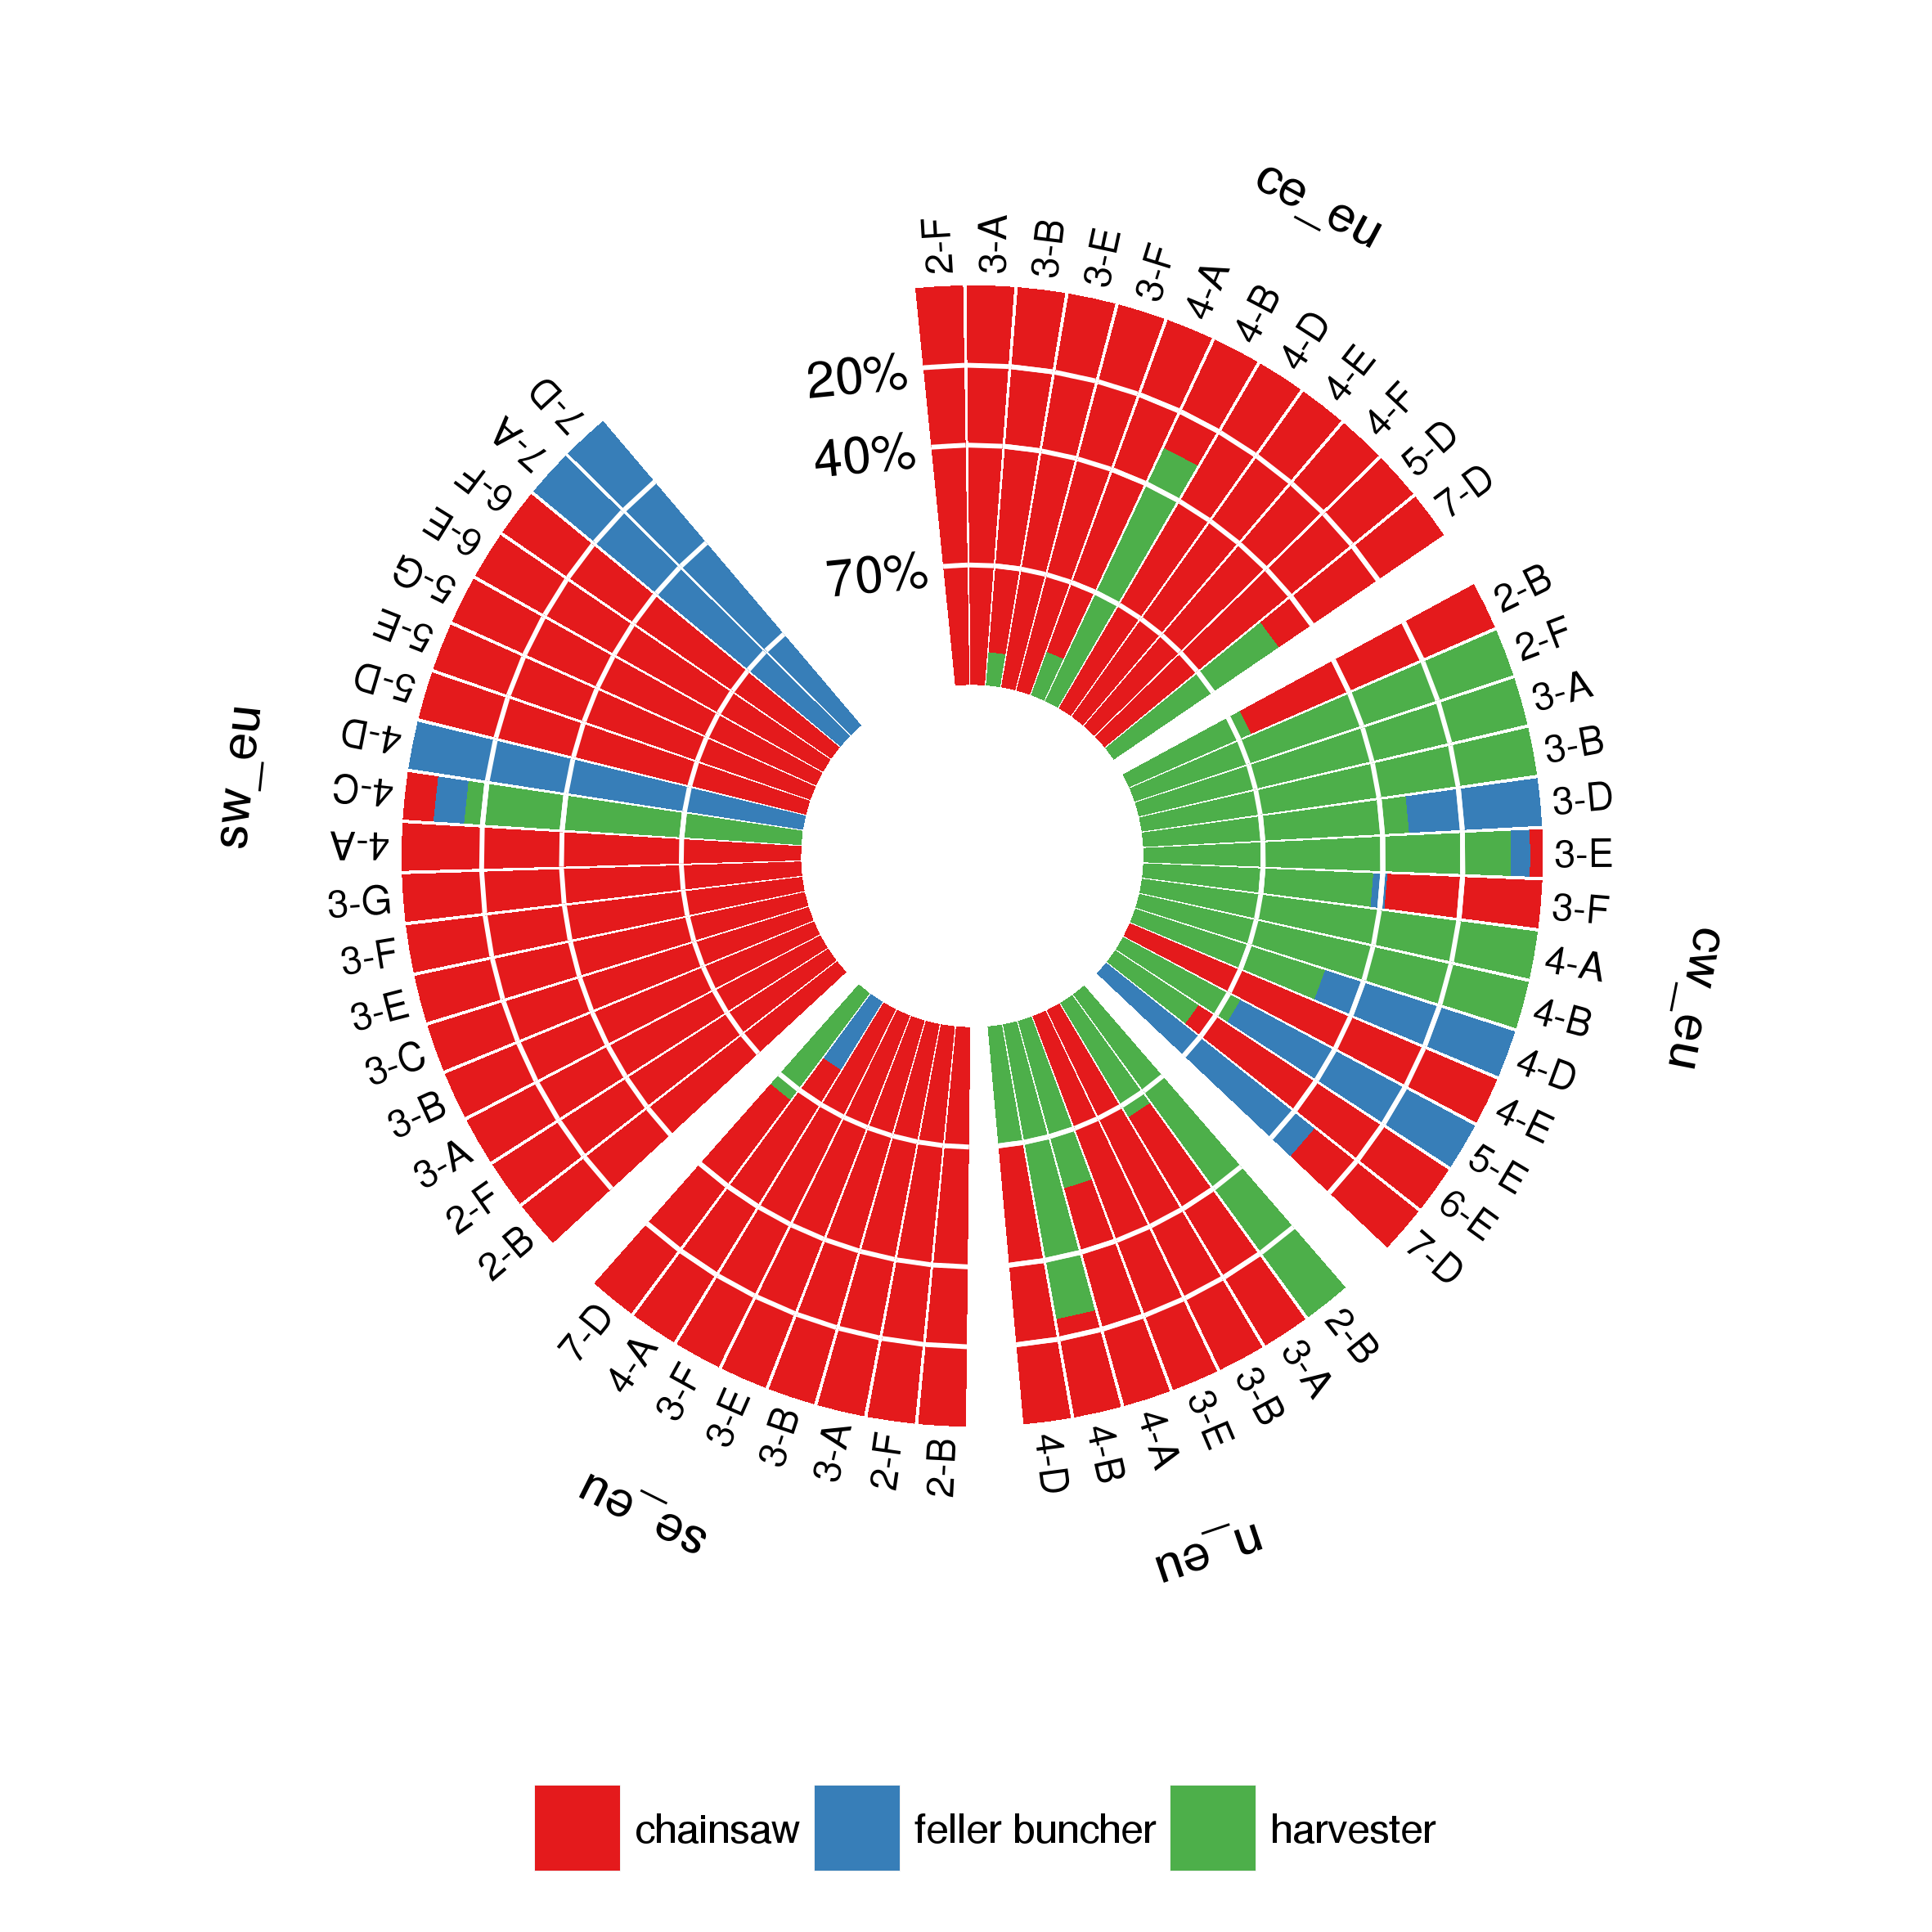

In [12]:
%%R -w 15 -h 15 -u cm --res 400 --p 14 #to change the graph resolution, see https://ipython.org/ipython-doc/2/config/extensions/rmagic.html

#this cell plot machineries
library(easyGgplot2)
library(phenotypicForest)
# theme_set(theme_gray(base_size = 15)) #change size font legend
p<-polarHistogram(mach_fell, 
                  columnNames = c("family"="Ecore_WP5", "item"="FU","score"="machine","value"="count"),#by ecoreg
                  
#                   columnNames = c("family"="FU","item"="Ecore_WP5","score"="machine","value"="count"),#by FU
                  
                  familyLabel=TRUE,
                  spaceItem=0.07,

#                   normalised = FALSE,
                  innerRadius = 0.3,
                  outerRadius = 1,
                  alphaStart = -0.1,
                  circleProportion = 0.92,
                  direction=1, #1 from the outside to the centre, 2 the opposite

                  guides = c(20, 40, 70))


p <-p + theme(legend.position="bottom", plot.margin=unit(c(0,0,0,0),"mm")) #for easyggplot put legend at the bottom and delete margins
p <-p + guides(fill=guide_legend(title=NULL)) #title=NULL delete title of fill (i.e. score)

# print(p)
plot(p)

# number thinnings

In [13]:
reg_coun=combined[['Country','Ecore_WP5', "FU",'intervention']]
reg_coun=reg_coun[reg_coun['intervention']=='thinning']

reg_coun=reg_coun[['Country','Ecore_WP5', "FU",'intervention']].groupby(['Country','Ecore_WP5', "FU"]).size()
reg_coun=reg_coun.reset_index()
reg_coun.sort_values(by=0,ascending=False)

Country Ecore_WP5   FU   0
56    Netherlands     cw_eu  3-D  27
58    Netherlands     cw_eu  3-F  25
10        Belgium     cw_eu  4-E  25
31        Germany     cw_eu  3-E  23
57    Netherlands     cw_eu  3-E  20
69       Portugal     sw_eu  3-G  19
55    Netherlands     cw_eu  3-B  17
33        Germany     cw_eu  4-A  16
28        Germany     cw_eu  3-A  16
59    Netherlands     cw_eu  4-A  16
32        Germany     cw_eu  3-F  15
8         Belgium     cw_eu  3-F  15
29        Germany     cw_eu  3-B  12
7         Belgium     cw_eu  3-B  12
30        Germany     cw_eu  3-D  11
70       Portugal     sw_eu  4-C  10
80       Slovakia     ce_eu  3-E  10
79       Slovakia     ce_eu  3-B   9
6         Belgium     cw_eu  3-A   8
83       Slovakia     ce_eu  4-F   8
82       Slovakia     ce_eu  4-A   8
81       Slovakia     ce_eu  3-F   8
26         France     cw_eu  3-F   8
1         Austria     cw_eu  3-E   7
92    Switzerland     cw_eu  3-E   7
64         Poland     ce_eu  3-E   7
47      Lithuania      n_eu  3-A   6
41         Latvia      n_eu  3-A   6
66         Poland     ce_eu  4-A   6
62         Poland     ce_eu  3-A   6
..            ...       ...  ...  ..
12       Bulgaria     se_eu  3-B   2
24        Finland      n_eu  4-A   2
52      Lithuania      n_eu  4-D   2
46         Latvia      n_eu  4-D   2
60         Norway      n_eu  3-A   2
4         Austria     cw_eu  4-B   2
22        Estonia      n_eu  4-B   2
11       Bulgaria     se_eu  3-A   2
23        Estonia      n_eu  4-D   2
13       Bulgaria     se_eu  3-E   2
14       Bulgaria     se_eu  3-F   2
15  CzechRepublic     ce_eu  3-B   1
61         Norway      n_eu  4-B   1
17  CzechRepublic     ce_eu  4-A   1
5         Austria     cw_eu  4-D   1
94    Switzerland     cw_eu  4-A   1
3         Austria     cw_eu  4-A   1
16  CzechRepublic     ce_eu  3-F   1
20        Estonia      n_eu  3-A   1
18  CzechRepublic     ce_eu  4-B   1
19  CzechRepublic     ce_eu  4-E   1
35        Hungary     ce_eu  3-F   1
36        Hungary     ce_eu  4-A   1
37        Hungary     ce_eu  4-E   1
38        Hungary     ce_eu  7-D   1
74        Romania     ce_eu  5-D   1
39          Italy     sw_eu  4-A   1
40          Italy     sw_eu  4-C   1
54        Moldova     ce_eu  5-D   1
96    Switzerland     cw_eu  4-D   1

[97 rows x 4 columns]

# productivity

In [14]:
def filter_productivity(combined_df): 
    """function that put the data in a format to produce the graph i.e. all the productivities either if first, 2nd or 3rd are concatenated in one col only for 
    the three machineries used in felling or harvesting"""
    
    #take main equipment productivities (alteady checked intervention and is fine acseu also if not updated the new rows contains only planting and other non relevant things)
    main_prod=combined[['Country','Ecore_WP5', "Man_syst_code",'Sp_gr_code','FU','Main_equip','m3/h','intervention']]
                    
    #append the additional equiment productivities
    add_prod=combined[['Country','Ecore_WP5', "Man_syst_code",'Sp_gr_code','FU','Add_equip','m3/h_2','intervention']]
    add_prod.rename(columns={'Add_equip':'Main_equip','m3/h_2':'m3/h'},inplace=True)
    main_prod=main_prod.append(add_prod,ignore_index=True)
                    
    #append the additional equiment productivities
    th_prod=combined[['Country','Ecore_WP5', "Man_syst_code",'Sp_gr_code','FU','third_equip','m3/h_3','intervention']]
    th_prod.rename(columns={'third_equip':'Main_equip','m3/h_3':'m3/h'},inplace=True)
    main_prod=main_prod.append(th_prod,ignore_index=True)   
    
    #change name
    main_prod.rename(columns={'Main_equip':'machine'},inplace=True)

    #filter only machinery and internvetion needed
    filt_mach=['chainsaw','harvester','feller buncher']
    filt_int=['regeneration felling','thinning']

    filt_prod=main_prod[main_prod.machine.isin(filt_mach) & main_prod.intervention.isin(filt_int)]
    
    #rename regeneration felling
#     filt_prod.intervention.replace({'regeneration felling':'regeneration felling'},inplace=True)
    #sort value by man and sp group
    return filt_prod.sort_values('FU')

mach_prod=filter_productivity(combined)

/home/giuseppec/miniconda3/envs/graphs/lib/python3.5/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [15]:
mach_prod

Country Ecore_WP5  Man_syst_code Sp_gr_code   FU         machine  \
0         Austria     cw_eu            2.0          B  2-B        chainsaw   
1064  Switzerland     cw_eu            2.0          B  2-B        chainsaw   
237       Finland      n_eu            2.0          B  2-B       harvester   
438         Italy     sw_eu            2.0          B  2-B        chainsaw   
285       Germany     cw_eu            2.0          B  2-B       harvester   
999      Slovenia     se_eu            2.0          B  2-B        chainsaw   
1015        Spain     sw_eu            2.0          B  2-B        chainsaw   
286       Germany     cw_eu            2.0          F  2-F       harvester   
439         Italy     sw_eu            2.0          F  2-F        chainsaw   
1944      Romania     ce_eu            2.0          F  2-F        chainsaw   
1000     Slovenia     se_eu            2.0          F  2-F        chainsaw   
523     Lithuania      n_eu            3.0          A  3-A        chainsaw   
524     Lithuania      n_eu            3.0          A  3-A        chainsaw   
526     Lithuania      n_eu            3.0          A  3-A        chainsaw   
522     Lithuania      n_eu            3.0          A  3-A        chainsaw   
472        Latvia      n_eu            3.0          A  3-A        chainsaw   
471        Latvia      n_eu            3.0          A  3-A        chainsaw   
525     Lithuania      n_eu            3.0          A  3-A        chainsaw   
152      Bulgaria     se_eu            3.0          A  3-A        chainsaw   
528     Lithuania      n_eu            3.0          A  3-A        chainsaw   
470        Latvia      n_eu            3.0          A  3-A        chainsaw   
529     Lithuania      n_eu            3.0          A  3-A        chainsaw   
530     Lithuania      n_eu            3.0          A  3-A        chainsaw   
306       Germany     cw_eu            3.0          A  3-A       harvester   
710        Norway      n_eu            3.0          A  3-A       harvester   
711        Norway      n_eu            3.0          A  3-A       harvester   
712        Norway      n_eu            3.0          A  3-A       harvester   
713        Norway      n_eu            3.0          A  3-A        chainsaw   
721        Poland     ce_eu            3.0          A  3-A        chainsaw   
722        Poland     ce_eu            3.0          A  3-A        chainsaw   
...           ...       ...            ...        ...  ...             ...   
996      Slovakia     ce_eu            4.0          F  4-F        chainsaw   
843       Romania     ce_eu            5.0          D  5-D        chainsaw   
585       Moldova     ce_eu            5.0          D  5-D        chainsaw   
584       Moldova     ce_eu            5.0          D  5-D        chainsaw   
440         Italy     sw_eu            5.0          D  5-D        chainsaw   
1952      Romania     ce_eu            5.0          D  5-D        chainsaw   
287       Germany     cw_eu            5.0          E  5-E       harvester   
1016        Spain     sw_eu            5.0          E  5-E        chainsaw   
4         Austria     cw_eu            5.0          E  5-E  feller buncher   
1067  Switzerland     cw_eu            5.0          E  5-E  feller buncher   
441         Italy     sw_eu            5.0          G  5-G        chainsaw   
289       Germany     cw_eu            6.0          E  6-E       harvester   
47        Belgium     cw_eu            6.0          E  6-E        chainsaw   
1069  Switzerland     cw_eu            6.0          E  6-E        chainsaw   
6         Austria     cw_eu            6.0          E  6-E        chainsaw   
442         Italy     sw_eu            6.0          E  6-E        chainsaw   
443         Italy     sw_eu            6.0          F  6-F        chainsaw   
1045        Spain     sw_eu            7.0          A  7-A  feller buncher   
1043        Spain     sw_eu            7.0          A  7-A  feller buncher   
1042        Spain     sw_eu     

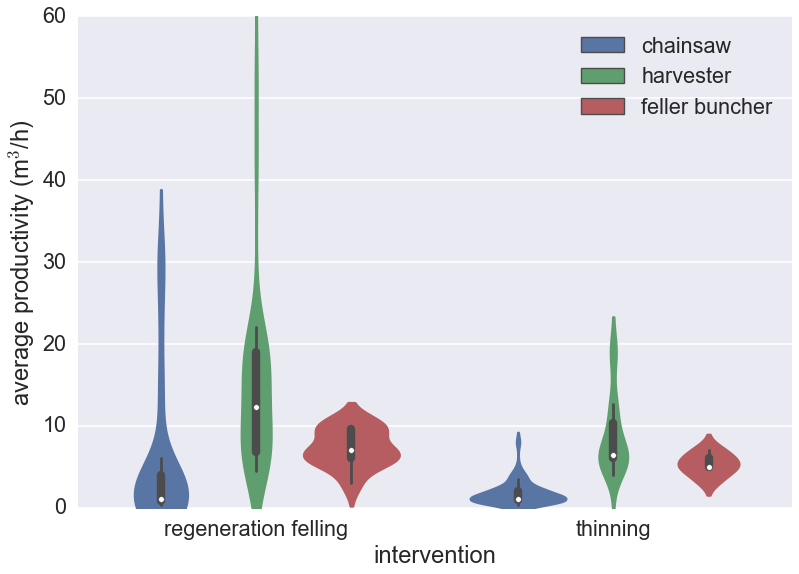

In [16]:
# calculate avg productivity by FU, country, ecoregion, internvetion and equipment
mach_avg_coun=mach_prod.groupby(['Country','Ecore_WP5', 'FU','machine','intervention'])['m3/h'].agg(['mean'])
mach_avg_coun=mach_avg_coun.rename(columns={'mean':'average productivity (m3/hr)'}).reset_index()
# mach_avg_coun.sort_values('count',ascending=False)


sns.set_context("poster",font_scale=1.35)

plt.ylim(0, 60) #to start from zero
sns.set_style("whitegrid")
ax = sns.violinplot(x="intervention", y="average productivity (m3/hr)", hue="machine", data=mach_avg_coun) #GOOD ONE!!
ax.set_ylabel('average productivity (m$^{3}$/h)')
ax.legend_.set_title(None)# delete title of legend

#other tests
# ax = sns.swarmplot(x="intervention", y="average productivity (m3/hr)",hue="machine", data=mach_avg_coun)
# ax = sns.boxplot(x="intervention", y="average productivity (m3/hr)",hue="machine", data=mach_avg_coun)
# ax = sns.violinplot(x="machine", y="average productivity (m3/hr)",hue="intervention",split=True, data=mach_avg_coun)#,inner="quartile")#, bw=.5 intervention

In [17]:
#median results
mach_avg_coun.groupby(['machine','intervention'])['average productivity (m3/hr)'].median().reset_index()

machine          intervention  average productivity (m3/hr)
0        chainsaw  regeneration felling                       1.08072
1        chainsaw              thinning                       1.07000
2  feller buncher  regeneration felling                       7.00000
3  feller buncher              thinning                       5.00000
4       harvester  regeneration felling                      12.30000
5       harvester              thinning                       6.43750

In [18]:
#to check the outliers
# mach_avg_coun.to_excel('/home/giuseppec/Downloads/mach_avg_coun.xls')
# os.system('xdg-open /home/giuseppec/Downloads/mach_avg_coun.xls')

# harvesting volumes

In [19]:
harv=combined[['Country','Ecore_WP5', "FU",'Man_syst_code','Sp_gr_code','type_of_intervention','intervention',
'm3_over_bark_Logs', 'm3_over_bark_pulp', 'm3_over_bark_Firewood', 
'm3_under_bark_Logs','m3_under_bark_pulp','m3_under_bark_Firewood',
'Loose_cubic_meter_chips','Stacked_cubic_meter_Firewood',
'm3_chips','Loose_cubic_meter_stumps/ha',
'dry_t_Logs','dry_t_pulp','dry_t_Firewood', 'dry_t_chips','dry_t_chips_stumps']]


# harv=combined[['Country','Ecore_WP5', "FU",'type_of_intervention','intervention',
               
# 'm3_over_bark_Logs','m3_under_bark_Logs','dry_t_Logs',
# 'm3_over_bark_pulp','m3_under_bark_pulp','dry_t_pulp',
# 'm3_over_bark_Firewood','m3_under_bark_Firewood','dry_t_Firewood', 'Stacked_cubic_meter_Firewood',           
# 'Loose_cubic_meter_chips', 'm3_chips','dry_t_chips',
# 'dry_t_chips_stumps',
# 'Loose_cubic_meter_stumps/ha'           
# ]]

#for logs firewood and pulp have to thake overbark, for chips in most cases m3_chips only for beglium Loose_cubic_meter_chips

# harv.to_excel('/home/giuseppec/Downloads/harv_2.xls')

In [20]:
#filter only thin and fellings
harv_no_plan=harv[harv.intervention.isin(['thinning', 'regeneration felling'])]
harv_no_plan=harv_no_plan.sort_values('FU')
# harv_no_plan=harv_no_plan.groupby(['Country','FU','intervention']).sum()
# harv_no_plan.reset_index(inplace=True)

In [21]:
#overbark thinning adn regeneration felling summed graph thest
#only cols needed
sum_th_fel=(harv_no_plan[['Ecore_WP5','FU','m3_over_bark_Logs', 'm3_over_bark_pulp', 'm3_over_bark_Firewood', 'Country','intervention']])#'Man_syst_code','Sp_gr_code',

#calculate total removals
sum_th_fel['tot']=sum_th_fel[['m3_over_bark_Logs', 'm3_over_bark_pulp', 'm3_over_bark_Firewood']].sum(axis=1)

##number of thin and fell and tota wood harvested by assortment
# gr_th_fel=gr_th_fel.groupby(['FU','Country','intervention'])['m3_over_bark_Logs', 'm3_over_bark_pulp', 'm3_over_bark_Firewood','tot'].agg(['sum','size']).reset_index()

#tot harvested wood by country, FU, country, intervention
gr_th_fel=sum_th_fel.groupby(['Ecore_WP5','FU','Country','intervention']).sum().reset_index()

print(gr_th_fel.shape)
# gr_th_fel.head()

(229, 8)


/home/giuseppec/miniconda3/envs/graphs/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [22]:
# #noramlize per rotation lenght
# rot=pd.read_excel('/media/giuseppec/25F62A4E5FEED162/work/papers/first paper questionnarie/ELCIFO/database/general_information.xls')[[
#         'Country','Eco_code','FoU','Rotation']]

# rot.columns=['Country','Ecore_WP5','FU','Rotation']
# rot.Rotation=pd.to_numeric(rot.Rotation.str.split('-').str[1])
# # rot.Rotationpd.to_numeric(rot.Rotation)
# sum_th_fel=pd.merge(sum_th_fel,rot,how='left',on=['Country','Ecore_WP5','FU'])
# #noramlize
# for x in ['m3_over_bark_Logs', 'm3_over_bark_pulp','m3_over_bark_Firewood']:
#     sum_th_fel[x]=sum_th_fel[x]/sum_th_fel.Rotation 
# sum_th_fel.tot=sum_th_fel.tot/sum_th_fel.Rotation
# sum_th_fel.dropna(subset=['tot'],inplace=True)
# sum_th_fel=sum_th_fel[sum_th_fel.FU.str.contains("2") == False] # dele cont cov for

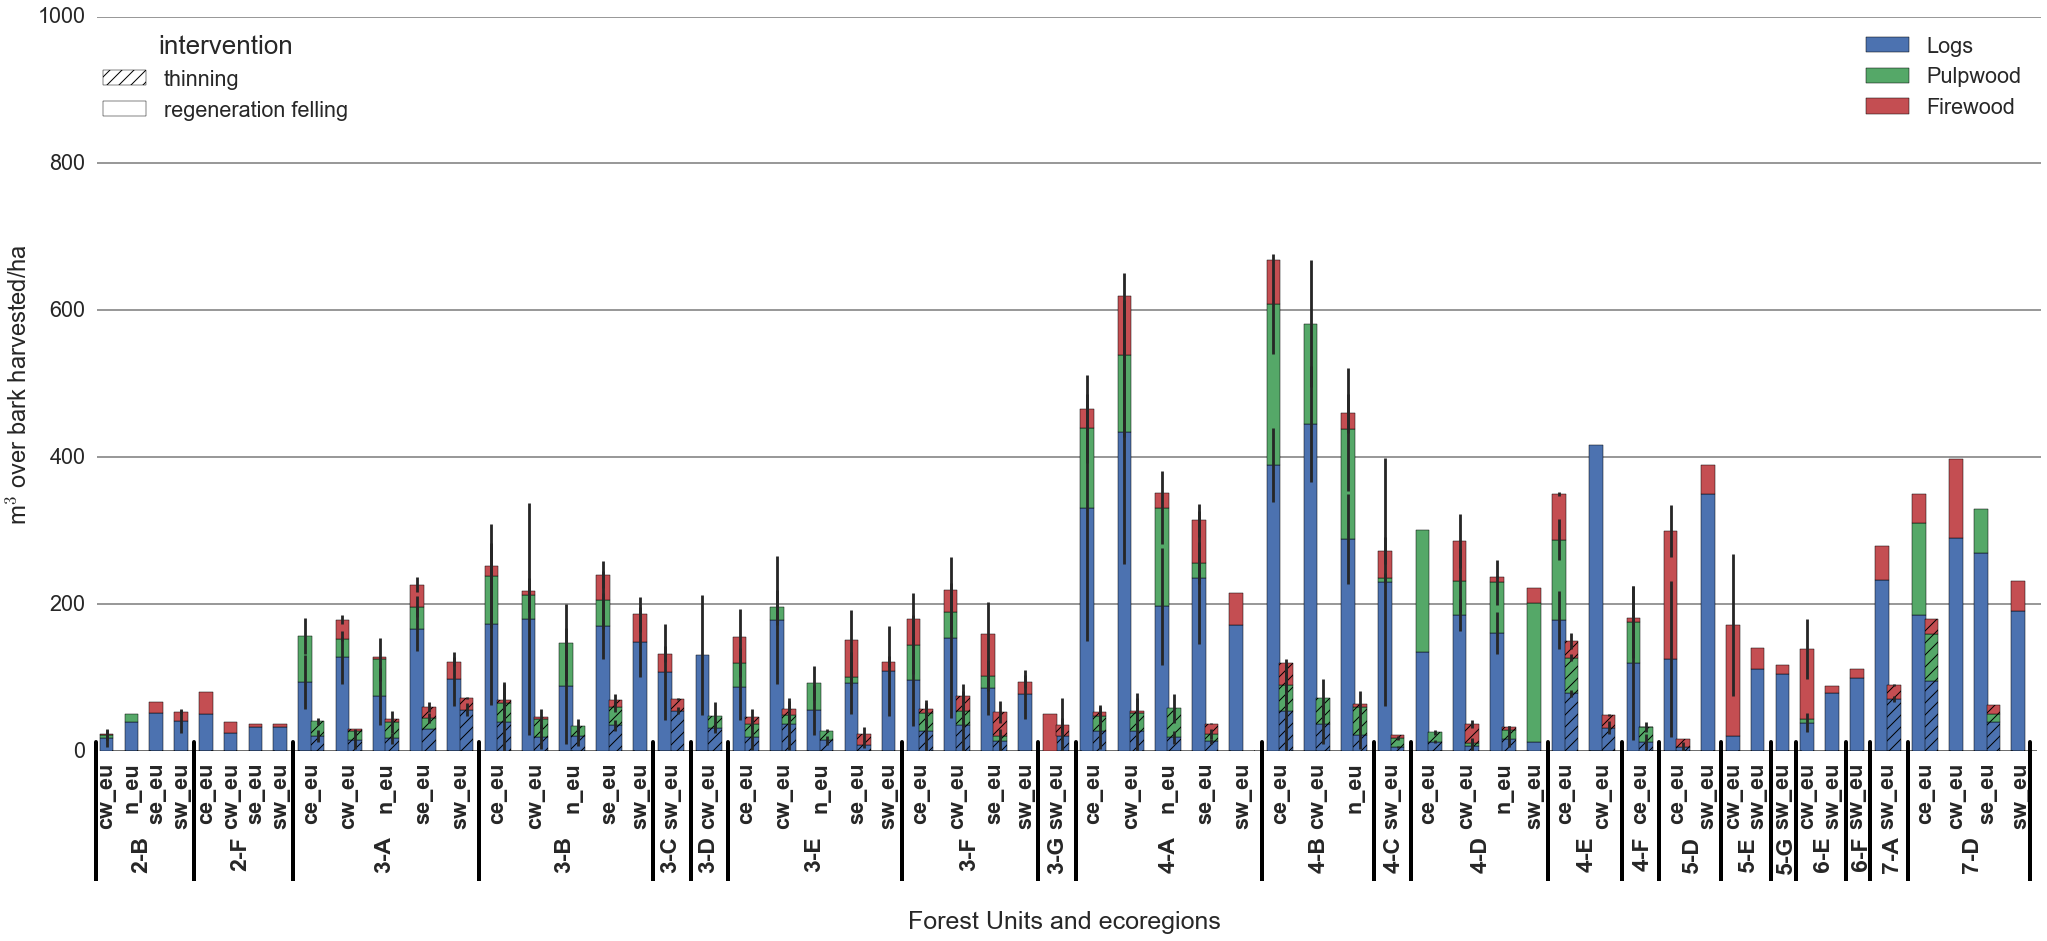

In [23]:
#######
#BY FU#
#######

# plt.rcParams['errorbar.capsize']=0.01
# ,capsize=4,capthick=1)

# eco_div_norm=None

sns.set_style('darkgrid')
sns.set_context("poster",font_scale=1.35)

#create zero rows for space betewen FU and concat 
zeros=sum_th_fel[['Ecore_WP5','FU']].drop_duplicates()
zeros['intervention']='zero'
zeros['m3_over_bark_Logs']=np.nan
zeros['m3_over_bark_pulp']=np.nan
zeros['m3_over_bark_Firewood']=np.nan
add_zero=pd.concat([sum_th_fel,zeros])

#group by eco,FU and interventions
gr=add_zero.groupby(['FU','Ecore_WP5','intervention'])['m3_over_bark_Logs', 'm3_over_bark_pulp', 'm3_over_bark_Firewood']#.agg(['sum','std','size']).reset_index()


#create x labels names
ind=[x for x in gr.groups]
ind.sort()

    #crate the empty name for zeros in FU
zero_lab=['' if x[2]=='zero' else x[1] for x in ind]

    # convert duplicates fu names in empty
x_lab=[]
for i,x in enumerate(zero_lab):
    if x==zero_lab[i-1]:
        x_lab.append('')
    else:
        x_lab.append(x)

#calculate means and stdevs
means = gr.mean()
errors = gr.std()


# Plot
fig, ax = plt.subplots()
    #create axes and make withe
ax = fig.add_axes( [.05, .15, .9, .85] )
ax.patch.set_facecolor('white') # change background color see http://stackoverflow.com/a/23907866/4929813

#non norm
plt.ylim(0.1, 1000) # to not show the small bar in the spaces (i.e. zeros) see http://stackoverflow.com/a/13983540/4929813
# norm
# plt.ylim(0.1, 27) # to not show the small bar in the spaces (i.e. zeros) see http://stackoverflow.com/a/13983540/4929813


p=means.plot.bar(stacked=True,yerr=errors,width=1.1, sort_columns=True,ax=ax,figsize=(30, 12),grid="off") #with yerr can add the bars


# hatch thinnings bars
num=3 # dunno why need to start from 3 and not 1

st=pd.DataFrame(means.stack(dropna=False)).reset_index() #stack 
st.level_3.replace({'m3_over_bark_Logs':'1m3_over_bark_Logs','m3_over_bark_pulp':'2m3_over_bark_pulp','m3_over_bark_Firewood':'3m3_over_bark_Firewood'}
                   ,inplace=True) #change name type wood to put them in correct order
st.sort_values(['level_3','FU','Ecore_WP5','intervention'],inplace=True)

for name,row in st.iterrows():
#     if row['intervention']=='zero':
#         ax.get_children()[num].set_width(4)

    if pd.notnull(row[0]) and row['intervention']=='thinning':
        ax.get_children()[num].set_hatch('//')
#             ax.get_children()[num].set_width(4)

    num+=1
    

#change xticks names and position
    #calculate new position
xt_pos=list(zip(x_lab,ax.get_xticks()))
new_pos=[]
for i in range(0,len(xt_pos)-2):
    if (xt_pos[i][0]) != '' and (xt_pos[i+1][0]) == '' and (xt_pos[i+2][0]) == '' :
        new_pos.append(i+0.5)
    else:
        new_pos.append(i)
new_pos.append(len(xt_pos)-1.8) #deal with last one
        
ax.set_xticks(new_pos) #change position x
ax.set_xticklabels(x_lab,weight='bold') #change labels x
ax.set_xlabel('') #remove x-axes name

##add FU names
    # get ecoregion names
eco=list(set([x[0] for x in ind]))
eco.sort()


#     calculate position lines (done manually in div below to adjust minor things, but needed in this position)
len_eco=add_zero[['Ecore_WP5','FU','intervention']].drop_duplicates().groupby('FU') #calc number col
eco_div=[(1/len(gr)*len(v)) for k,v in len_eco] #check distance change
eco_div_norm=[sum(eco_div[:k]) for k in range(1+len(eco_div))] #normalize to 1
eco_div_norm= [0.001]+eco_div_norm[1:-1]+[0.999] #to adjust the 2 extremes


    # calculate position text    
pos_groups=[]
for i in range(0, len(eco_div_norm)-1):
    pos_groups.append(((eco_div_norm[i]+eco_div_norm[i+1])/2))
    #add
for (name,pos) in zip(eco,pos_groups):
    plt.annotate(name, (0,0), (((pos-0.008)), -0.115), xycoords='axes fraction', fontsize=23,textcoords='axes fraction', weight="bold",va='top',rotation=90) # add text somewhere (this is on the axes for ecoregion)


# #add main divisory bar for FU from http://calebmadrigal.com/draw-lines-with-matplotlib/
    #create second axes
ax2 = plt.axes([0.049,0,0.897,1], axisbg=(1,1,1,0))#create axes2
ax2.set_xticklabels([]);ax2.set_yticklabels([]);ax2.grid(False) #do not show ticks second axes and grid

    #add lines
for div in eco_div_norm:
    line = lines.Line2D((div,div), (0,0.16), linewidth=4, color='black') #create the line
    ax2.add_line(line)

# add second legend
# import matplotlib.patches as mpatches
thi = patches.Patch(facecolor='white',edgecolor='black',label='thinning',hatch='//')
fel = patches.Patch(facecolor='white',edgecolor='black', label='regeneration felling')
ax2.legend(handles=[thi,fel], loc=[0,0.87], title='intervention')

# add horizontal grids
ax.yaxis.grid(True,color='grey')
# ax.errorbar(capsize=2)
plt.gcf().subplots_adjust(bottom=0.30)#,hspace = 0, wspace = 0) #to avoid that the bottom is cutted during the export
ax.set_ylabel('m$^{3}$ over bark harvested/ha')

# ax.legend(['m3 over bark Logs', 'm3 over bark Pulpwood', 'm3 over bark Firewood'])
ax.legend(['Logs', 'Pulpwood', 'Firewood'])
#add xlabels
plt.annotate('Forest Units and ecoregions', (0,0), (((0.42)), -0.035), xycoords='axes fraction', fontsize=25,textcoords='axes fraction', weight="light",va='top') # add text somewhere (this is on the axes for ecoregion)

# plt.savefig('/home/giuseppec/Downloads/thin_fell_error.png', dpi=400)
# plt.savefig('/media/giuseppec/25F62A4E5FEED162/work/papers/first paper questionnarie/manuscript/pictures/thin_fell_error2.png', dpi=400, bbox_inches='tight') #bbox_inches to remove extra white space in immage see http://stackoverflow.com/a/9295472/4929813

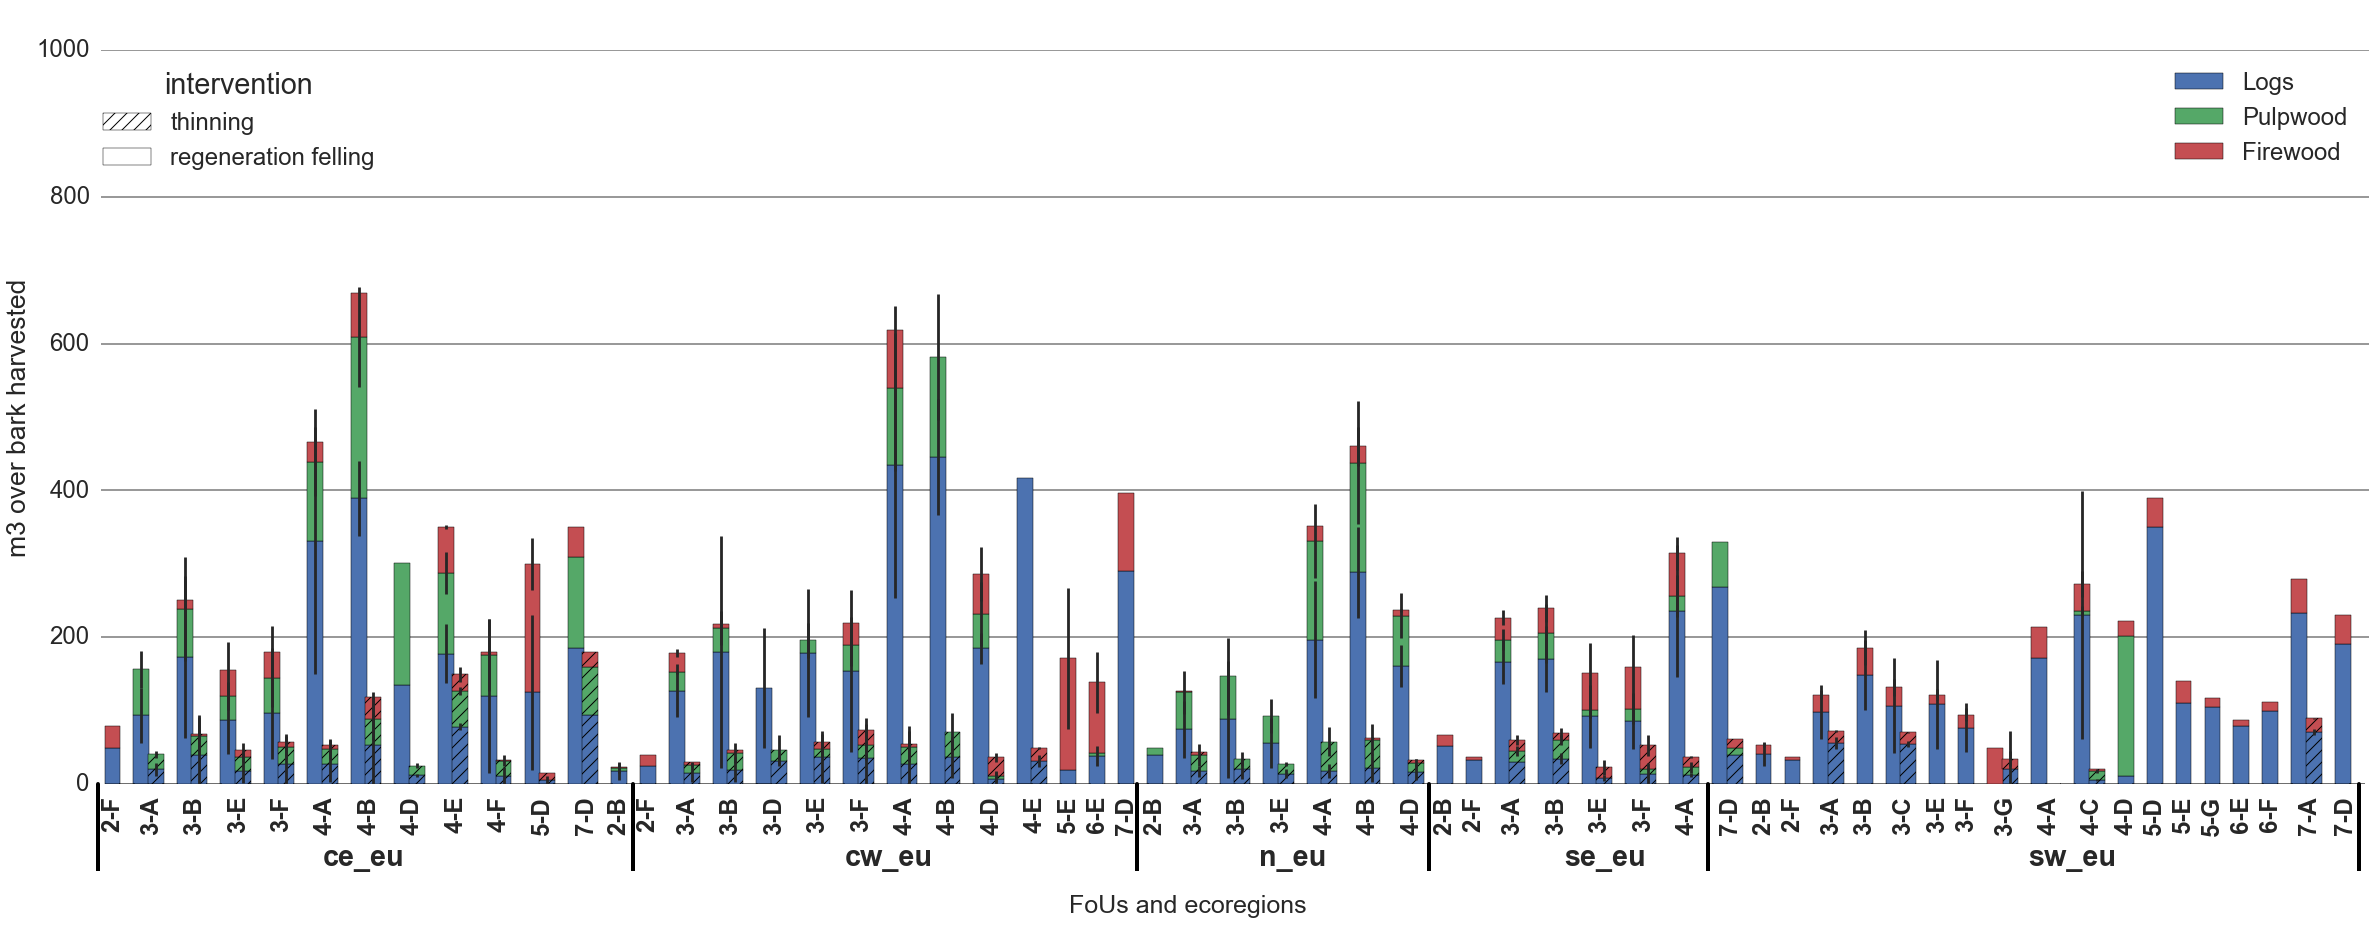

In [26]:
###########
#BY ECOREG#
###########
eco_div_norm=None

sns.set_context("poster",font_scale=1.5)


#create zero rows for space betewen FU and concat 
zeros=gr_th_fel[['Ecore_WP5','FU']].drop_duplicates()
zeros['intervention']='zero'
zeros['m3_over_bark_Logs']=np.nan
zeros['m3_over_bark_pulp']=np.nan
zeros['m3_over_bark_Firewood']=np.nan
add_zero=pd.concat([sum_th_fel,zeros])

#group by eco,FU and interventions
gr=add_zero.groupby(['Ecore_WP5','FU','intervention'])['m3_over_bark_Logs', 'm3_over_bark_pulp', 'm3_over_bark_Firewood']#.agg(['sum','std','size']).reset_index()


#create x labels names
ind=[x for x in gr.groups]
ind.sort()

    #crate the empty name for zeros in FU
zero_lab=['' if x[2]=='zero' else x[1] for x in ind]

    # convert duplicates fu names in empty
x_lab=[]
for i,x in enumerate(zero_lab):
    if x==zero_lab[i-1]:
        x_lab.append('')
    else:
        x_lab.append(x)


#calculate means and stdevs
means = gr.mean()
errors = gr.std()


# Plot
fig, ax = plt.subplots()
    #create axes and make withe
ax = fig.add_axes( [.05, .1, .9, .85 ] )
ax.patch.set_facecolor('white') # change background color see http://stackoverflow.com/a/23907866/4929813



plt.ylim(0.1, 1000) # to not show the small bar in the spaces (i.e. zeros) see http://stackoverflow.com/a/13983540/4929813
p=means.plot.bar(stacked=True,yerr=errors,width=1.1, sort_columns=True,ax=ax,figsize=(35, 12),grid="off") #with yerr can add the bars


# hatch thinnings bars
num=3 # dunno why need to start from 3 and not 1

st=pd.DataFrame(means.stack(dropna=False)).reset_index() #stack 
st.level_3.replace({'m3_over_bark_Logs':'1m3_over_bark_Logs','m3_over_bark_pulp':'2m3_over_bark_pulp','m3_over_bark_Firewood':'3m3_over_bark_Firewood'}
                   ,inplace=True) #change name type wood to put them in correct order
st.sort_values(['level_3','Ecore_WP5','FU','intervention'],inplace=True)

for name,row in st.iterrows():
#     if row['intervention']=='zero':
#         ax.get_children()[num].set_width(4)

    if pd.notnull(row[0]) and row['intervention']=='thinning':
        ax.get_children()[num].set_hatch('//')
#             ax.get_children()[num].set_width(4)

    num+=1


#change xticks names and position
    #calculate new position
xt_pos=list(zip(x_lab,ax.get_xticks()))
new_pos=[]
for i in range(0,len(xt_pos)-2):
    if (xt_pos[i][0]) != '' and (xt_pos[i+1][0]) == '' and (xt_pos[i+2][0]) == '' :
        new_pos.append(i+0.7)
    else:
        new_pos.append(i)
new_pos.append(len(xt_pos)-1.8) #deal with last one
        
ax.set_xticks(new_pos) #change position x
ax.set_xticklabels(x_lab,weight='bold',size=24) #change labels x
ax.set_xlabel('') #remove x-axes name

##add ecoregion names
    # get ecoregion names
eco=list(set([x[0] for x in ind]))
eco.sort()


#     calculate position lines (done manually in div below to adjust minor things, but needed in this position)
len_eco=add_zero[['Ecore_WP5','FU','intervention']].drop_duplicates().groupby('Ecore_WP5') #calc number col
eco_div=[(1/len(gr)*len(v)) for k,v in len_eco] #check distance change
eco_div_norm=[sum(eco_div[:k]) for k in range(1+len(eco_div))] #normalize to 1
eco_div_norm= [0.001]+eco_div_norm[1:-1]+[0.999] #to adjust the 2 extremes



    # calculate position text
pos_groups=[]
for i in range(0, len(eco_div_norm)-1):
    pos_groups.append(((eco_div_norm[i]+eco_div_norm[i+1])/2))
    #add
for (name,pos) in zip(eco,pos_groups):
    plt.annotate(name, (0,0), (((pos-0.015)), -0.08), xycoords='axes fraction', textcoords='axes fraction', weight="bold",va='top',rotation=0) # add text somewhere (this is on the axes for ecoregion)


# #add main divisory bar for ecoregion from http://calebmadrigal.com/draw-lines-with-matplotlib/
    #create second axes
ax2 = plt.axes([0.047,0,.9,1], axisbg=(1,1,1,0))#create axes2
ax2.set_xticklabels([]);ax2.set_yticklabels([]);ax2.grid(False) #do not show ticks second axes and grid


    #add lines
for div in [0.002,
             0.238,
             0.46,
             0.589,
             0.712,
             0.999]:
    line = lines.Line2D((div,div), (0,0.1), linewidth=4, color='black') #create the line
    ax2.add_line(line)
    

# add second legend
# import matplotlib.patches as mpatches
thi = patches.Patch(facecolor='white',edgecolor='black',label='thinning',hatch='//')
fel = patches.Patch(facecolor='white',edgecolor='black', label='regeneration felling')
ax2.legend(handles=[thi,fel], loc=[0,0.8], title='intervention')

# add horizontal grids
ax.yaxis.grid(True,color='grey')
# ax.errorbar(capsize=2)
plt.gcf().subplots_adjust(bottom=0.30)#,hspace = 0, wspace = 0) #to avoid that the bottom is cutted during the export
ax.set_ylabel('m3 over bark harvested')

# ax.legend(['m3 over bark Logs', 'm3 over bark Pulpwood', 'm3 over bark Firewood'])
ax.legend(['Logs', 'Pulpwood', 'Firewood'])#,fontsize=13)
#add xlabels
plt.annotate('FoUs and ecoregions', (0,0), (((0.43)), -0.028), xycoords='axes fraction', fontsize=25,textcoords='axes fraction', weight="light",va='top') # add text somewhere (this is on the axes for ecoregion)

# # plt.savefig('/home/giuseppec/Downloads/thin_fell_error.png', dpi=500)
# # plt.savefig('/media/giuseppec/25F62A4E5FEED162/work/papers/first paper questionnarie/manuscript/pictures/thin_fell_error.png', dpi=500, bbox_inches='tight') #bbox_inches to remove extra white space in immage see http://stackoverflow.com/a/9295472/4929813